In [1]:
!git clone https://github.com/SiddheshKotwal/Predictive-Analytics-for-Corporate-Success-and-Growth.git

fatal: destination path 'Predictive-Analytics-for-Corporate-Success-and-Growth' already exists and is not an empty directory.


In [2]:
%cd Predictive-Analytics-for-Corporate-Success-and-Growth

/content/Predictive-Analytics-for-Corporate-Success-and-Growth


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Employee Satisfaction/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.drop('DailyRate', axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 34)

In [7]:
print(df[df['Attrition'] == 'Yes'].value_counts().sum())
print(df[df['Attrition'] == 'No'].value_counts().sum())

237
1233


Data is Biased on one side so we need to make it unbiased

In [8]:
df.drop(df[df['Attrition'] == 'No'].index[:950], inplace=True, axis=0)

In [9]:
print(df[df['Attrition'] == 'No'].value_counts().sum())
print(df[df['Attrition'] == 'Yes'].value_counts().sum())

283
237


In [10]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,520.000000,520,520,520,520.000000,520.000000,520,520.0,520.000000,520.000000,...,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,283,358,321,NaN,NaN,204,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,35.488462,NaN,NaN,NaN,9.800000,2.930769,NaN,1.0,1459.238462,2.619231,...,2.640385,80.0,0.744231,10.001923,2.773077,2.725000,6.238462,3.803846,2.032692,3.707692
std,9.073021,NaN,NaN,NaN,8.256159,0.996630,NaN,0.0,576.905415,1.129912,...,1.083909,0.0,0.887705,7.184199,1.288173,0.741912,5.614877,3.582766,3.084689,3.387490
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,1099.500000,2.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,34.000000,NaN,NaN,NaN,8.000000,3.000000,NaN,1.0,1697.500000,3.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,41.000000,NaN,NaN,NaN,15.000000,4.000000,NaN,1.0,1878.500000,4.000000,...,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000


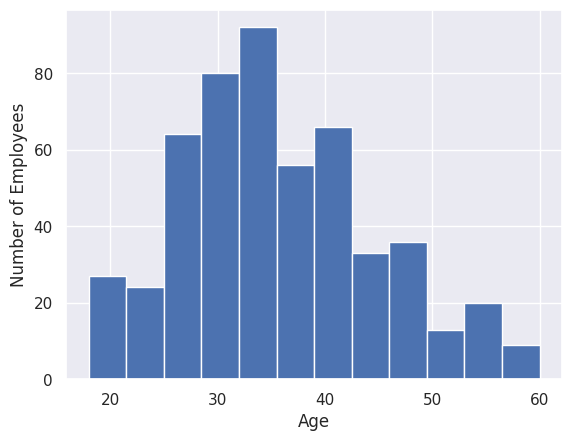

In [11]:
plt.hist(x=df['Age'], bins=12)
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

Age group vs Number of employee is normaly distributed or we can slighlty right skewed

In [12]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [13]:
print('Average Age people where they prefer to Stay in Company: ', df[df['Attrition'] == 'No']['Age'].mean())
print('Average Age people where they prefer to Leave the Company: ', df[df['Attrition'] == 'Yes']['Age'].mean())

Average Age people where they prefer to Stay in Company:  37.063604240282686
Average Age people where they prefer to Leave the Company:  33.607594936708864


In [14]:
from scipy.stats import ttest_ind

attrition_yes = np.array(df[df['Attrition'] == 'Yes']['Age'])
attrition_no = np.array(df[df['Attrition'] == 'No']['Age'])

t_statistic, p_value = ttest_ind(attrition_yes, attrition_no)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in mean ages is statistically significant.")
else:
    print("There is no statistically significant difference in mean ages.")


T-statistic: -4.401944939263718
P-value: 1.3036348748856163e-05
The difference in mean ages is statistically significant.


In [15]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Attrition'], df['Age'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("There is a significant association between age groups and attrition status.")
else:
    print("There is no significant association between age groups and attrition status.")


Chi-square statistic: 79.7713329994103
P-value: 0.00018761458774859408
Degrees of freedom: 40
There is a significant association between age groups and attrition status.


These **t-Statistics** and **chi-square** test results shows that **age is statistically significant predictor of Employee Attrition**.

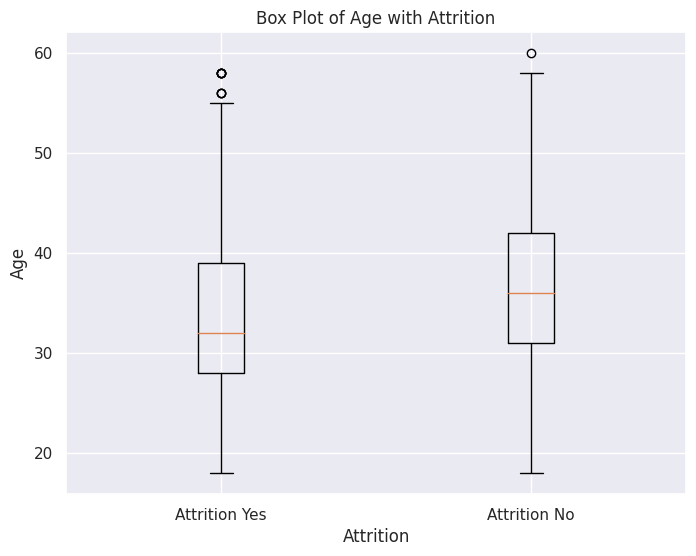

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Attrition'] == 'Yes']['Age'], df[df['Attrition'] == 'No']['Age']],
            labels=['Attrition Yes', 'Attrition No'])
plt.title('Box Plot of Age with Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

We can see that average age of employee which **prefer to stay** in company is **37** and employee **prefer to leave** is **33**, so to keep company in proper workflow we need the **employee turnover** to be **moderate** not so many people to be recruited every year and keep the existing employee satisfied so they will stay longer, this way there will be moderate employee turnover and company will not face workflow issues, so by this analysis we can say that company should have **equal percentage of employees between 25-32 age gap and 32-45 age gap**.

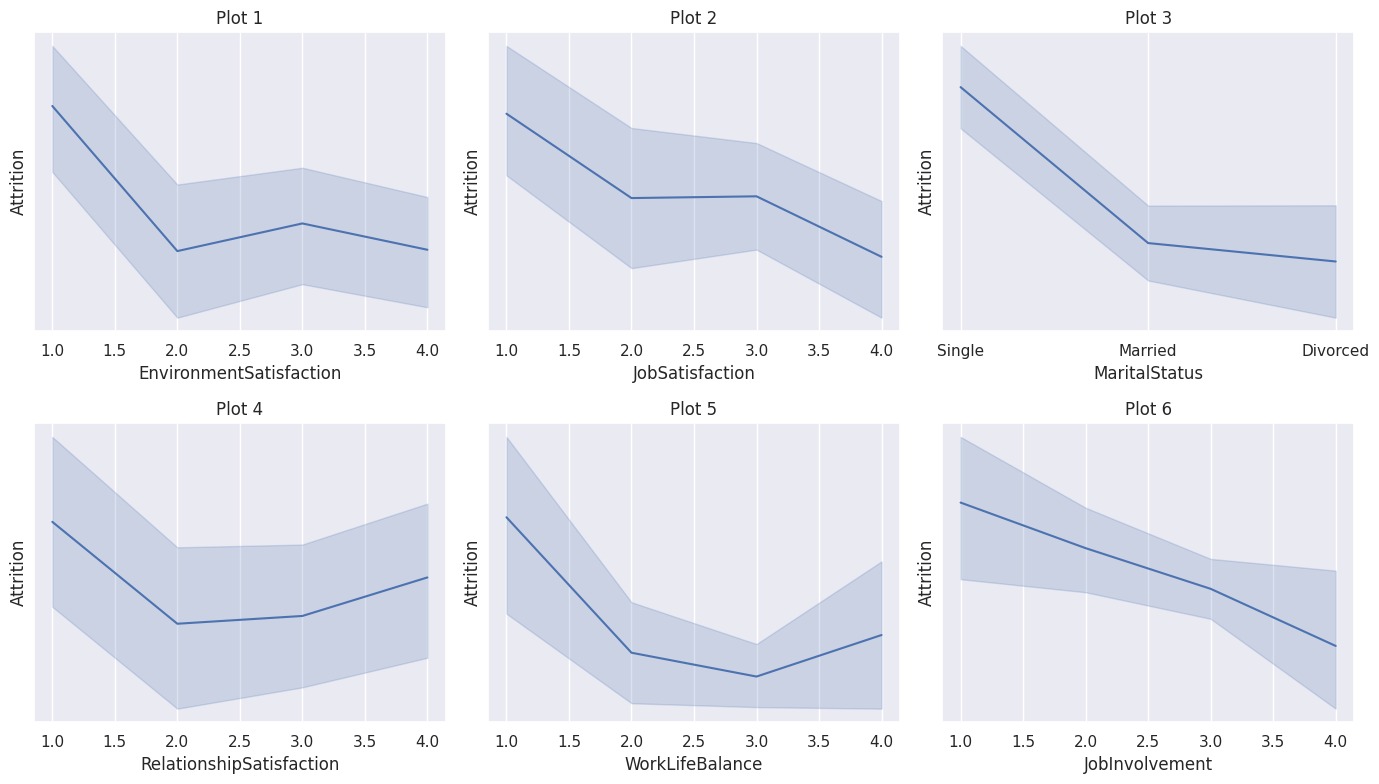

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

sns.lineplot(y=df['Attrition'], x=df['EnvironmentSatisfaction'], data=df, ax=axes[0, 0])
axes[0, 0].set_title('Plot 1')

sns.lineplot(y=df['Attrition'], x=df['JobSatisfaction'], data=df, ax=axes[0, 1])
axes[0, 1].set_title('Plot 2')

sns.lineplot(y=df['Attrition'], x=df['MaritalStatus'], data=df, ax=axes[0, 2])
axes[0, 2].set_title('Plot 3')

sns.lineplot(y=df['Attrition'], x=df['RelationshipSatisfaction'], data=df, ax=axes[1, 0])
axes[1, 0].set_title('Plot 4')

sns.lineplot(y=df['Attrition'], x=df['WorkLifeBalance'], data=df, ax=axes[1, 1])
axes[1, 1].set_title('Plot 5')

sns.lineplot(y=df['Attrition'], x=df['JobInvolvement'], data=df, ax=axes[1, 2])
axes[1, 2].set_title('Plot 6')

plt.tight_layout()
plt.show()

As the above plots suggests that there is relation between the **Attrition** and these four variables which will help companies to maintain the Employees to work in their company for a long time or a moderate amount of time which will be helpful for the **companies growth and sustainability** by establishing the environment of the work offices such that the employees would feel connected and involved into work and life. Which inturn will cooperate in **maintaining moderate employee turnover**.

These are the Variables where company can focus on to maintain their **Employees turnovers.**

In [18]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1})
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,Research & Development,24,3,Life Sciences,1,19,3,...,2,80,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,Sales,9,4,Life Sciences,1,27,3,...,2,80,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,Research & Development,6,1,Medical,1,31,2,...,3,80,0,8,2,3,4,2,1,3


In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
print(df[df['Attrition'] == 1].value_counts().sum())
print(df[df['Attrition'] == 0].value_counts().sum())

204
218


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'JobInvolvement']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
y_pred = lmodel.predict(X_test)

print('Mean squared error:', np.mean((y_test - y_pred)**2))
print('Root mean squared error:', np.sqrt(np.mean((y_test - y_pred)**2)))
print('R-squared:', lmodel.score(X_test, y_test))


Mean squared error: 0.26451570601574825
Root mean squared error: 0.5143109040412698
R-squared: -0.05843962706301542


In [22]:
print(lmodel.coef_)

[-0.04504696 -0.04260778 -0.32841427 -0.08807713]


In [23]:
import statsmodels.api as sm

X = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'JobInvolvement']]
y = df['Attrition']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     12.35
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.67e-09
Time:                        15:10:51   Log-Likelihood:                -282.42
No. Observations:                 422   AIC:                             574.8
Df Residuals:                     417   BIC:                             595.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0893      0.114      9.531      0.000       0.865       1.314
EnvironmentSatisfaction    -0.0356      0.020     -1.743      0.082      -0.076       0.005
JobSatisfaction            -0.0623      0.021     -2.930      0.004      -0.104      -0.020
MaritalStatus              -0.2496      0.047     -5.366      0.000      -0.341      -0.158
JobInvolvement             -0.0818      0.031     -2.668      0.008      -0.142      -0.022
==============================================================================
Omnibus:                     3030.647   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.502
Skew:                           0.101   Prob(JB):                     2.17e-10
Kurtosis:                       1.422   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

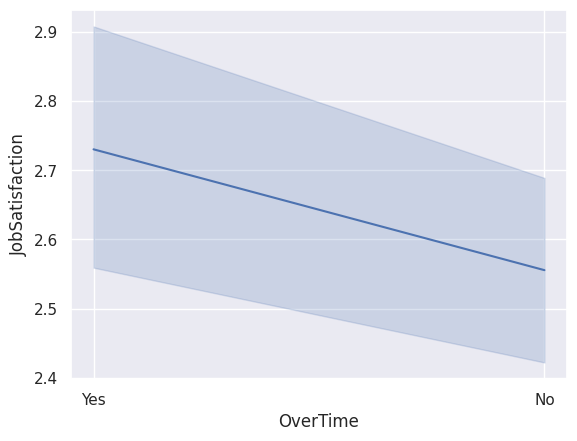

In [24]:
sns.lineplot(y=df['JobSatisfaction'], x=df['OverTime'])
plt.show()

This Last insight says that people who are **working overtime** are satisfied with their job and will be staying in the same company for moderate amount of time on an average

Therefore, these are all features/variables which are dependent on **Job** **Satisfaction** and **Attrition** of Employees


*   **OverTime**
* **EnvironmentSatisfaction**
* **MaritalStatus**
* **WorkLifeBalance**
* **JobInvolvement**
* **RelationshipSatisfaction**
